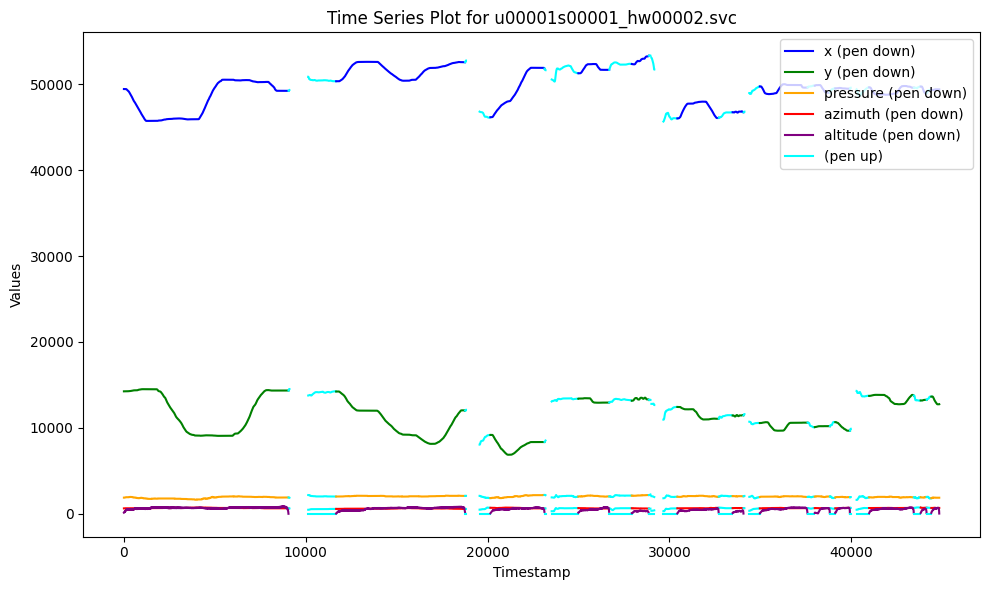

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the correct path to your .svc file relative to your notebook
directory = 'augmented_data'
filename = 'augmented_u00001s00001_hw00002.svc'
file_path = f'{directory}/{filename}'

# Load the .svc file into a pandas DataFrame
# Assuming the file is space-separated
columns = ['x', 'y', 'timestamp', 'pen_status', 'pressure', 'azimuth', 'altitude']
data = pd.read_csv(file_path, sep=' ', names=columns, header=None)

# Remove 'pen_status' column from the data
data = data.drop(columns=['pen_status'])

# Create a mask for gaps in the timestamp greater than 8 units
gap_threshold = 8
timestamp_diff = data['timestamp'].diff()  # Get the differences between consecutive timestamps
gap_mask = timestamp_diff > gap_threshold  # Find where gaps are greater than 8 units

# Apply the mask by setting values to NaN where the gap occurs
for col in columns:
    if col != 'timestamp':
        data.loc[gap_mask, col] = np.nan  # Set the column values to NaN where there's a gap

# Re-load 'pen_status' for handling color change logic
pen_status = pd.read_csv(file_path, sep=' ', names=['pen_status'], header=None, usecols=[3])

# Function to change color based on pen status, unique color per variable
def plot_segmented_lines(ax, x, y, status, color_down, color_up):
    start_idx = 0
    while start_idx < len(status):
        # Determine if the pen is down (1) or up (0) and set the color accordingly
        pen_down = status[start_idx] == 1
        segment_color = color_down if pen_down else color_up

        # Get the next break point (where the pen status changes or the series ends)
        try:
            next_idx = next(i for i in range(start_idx + 1, len(status)) if status[i] != status[start_idx])
        except StopIteration:
            next_idx = len(status)

        # Plot the segment with the corresponding color
        ax.plot(x[start_idx:next_idx], y[start_idx:next_idx], color=segment_color, label='_nolegend_')
        start_idx = next_idx

# Define distinct colors for each column when pen is down and a common color for pen up
colors_down = {
    'x': 'blue',        # Pen down color for x
    'y': 'green',       # Pen down color for y
    'pressure': 'orange', # Pen down color for pressure
    'azimuth': 'red',    # Pen down color for azimuth
    'altitude': 'purple'  # Pen down color for altitude
}

color_up = 'Cyan'  # Common pen up color for all variables

# Plot each column against the timestamp
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each column with changing color based on pen status
for col in ['x', 'y', 'pressure', 'azimuth', 'altitude']:
    color_down = colors_down[col]  # Get the unique pen down color for this variable
    plot_segmented_lines(ax, data['timestamp'], data[col], pen_status['pen_status'], color_down, color_up)

# Add titles and labels
plt.title(f'Time Series Plot for {filename}')
plt.xlabel('Timestamp')
plt.ylabel('Values')

# Create a legend manually since we don't want repeated labels from segments
for col in ['x', 'y', 'pressure', 'azimuth', 'altitude']:
    ax.plot([], [], color=colors_down[col], label=f'{col} (pen down)')
ax.plot([], [], color=color_up, label='(pen up)')

plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()
